In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
ncaaStats = pd.read_csv('Data/CSV Files/Database/playerAvgNCAA.csv')

In [3]:
ncaaStats.columns

Index(['ID', 'Player', 'Years', 'From', 'To', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF',
       'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS', '2P%', 'eFG%'],
      dtype='object')

In [4]:
ncaaStats['PIR'] = ((ncaaStats['PTS'] + ncaaStats['REB'] + ncaaStats['AST'] + 
                          ncaaStats['STL'] + ncaaStats['BLK']) - 
                          ((ncaaStats['FGA'] - ncaaStats['FGM']) + 
                           (ncaaStats['FTA'] - ncaaStats['FTM']) + ncaaStats['TOV']
                           + ncaaStats['PF']))
ncaaStats.head()

,ID,Player,Years,From,To,Team,GP,MIN,FGM,FGA,...,ORB,DRB,REB,AST,STL,BLK,PTS,2P%,eFG%,PIR
0,2749,Henry Domercant,1.0,2003.0,2003.0,EIU,30,33.700,8.833,19.200,...,2.000,4.800,6.800,2.767,1.433,0.500,28.200,47.432684,53.731771,23.566
1,1987,Ruben Douglas,1.0,2003.0,2003.0,UNM,28,35.071,7.786,19.607,...,1.857,4.750,6.607,2.071,1.250,0.286,27.964,39.875754,48.271026,18.107
2,456,Troy Bell,1.0,2003.0,2003.0,BC,31,38.645,7.226,16.387,...,1.548,3.032,4.581,3.710,2.258,0.226,25.194,48.367425,54.527979,20.809
3,452,Carmelo Anthony,1.0,2003.0,2003.0,SU,35,36.400,7.914,17.486,...,2.886,6.857,9.743,2.200,1.486,0.857,22.229,49.548772,49.834153,20.543
4,444,Mike Sweetney,1.0,2003.0,2003.0,GU,34,32.000,7.765,14.206,...,4.059,6.706,10.765,1.941,1.382,3.206,22.824,55.000708,54.660003,26.207


In [5]:
ncaaStats = ncaaStats[ncaaStats['From'] > 2014]
ncaaStats.head()

,ID,Player,Years,From,To,Team,GP,MIN,FGM,FGA,...,ORB,DRB,REB,AST,STL,BLK,PTS,2P%,eFG%,PIR
11213,17709,D'Angelo Russell,1.0,2015.0,2015.0,OSU,35,33.943,6.600,14.714,...,1.000,4.657,5.657,5.000,1.571,0.314,19.286,47.892531,54.077749,17.600
11214,11139,Jahlil Okafor,1.0,2015.0,2015.0,DUKE,38,30.079,7.342,11.053,...,3.526,4.947,8.474,1.289,0.763,1.421,17.289,66.425405,66.425405,18.393
11215,10166,Jeffrey Short,2.0,2015.0,2016.0,NSU,67,31.493,5.463,11.955,...,0.567,3.328,3.896,2.269,0.896,0.269,17.254,52.276534,54.186533,12.376
11216,12060,Justin Moss,1.0,2015.0,2015.0,UB,33,30.030,6.152,11.818,...,2.758,6.394,9.152,0.636,0.970,0.758,17.545,52.594682,52.056185,16.273
11217,4343,Melo Trimble,3.0,2015.0,2017.0,UMD,104,32.808,4.702,10.952,...,0.250,3.442,3.692,3.865,1.192,0.115,15.942,50.000000,50.703068,13.105


In [6]:
# top100 = pd.DataFrame()

url = 'Data/MockDraft2019/2019_Mock_Draft100.htm'
print(url)

html = open(url, 'r', encoding='utf-8')

soup = BeautifulSoup(html, "html.parser")

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[2:]

rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')][2:]
            for i in range(len(rows))]
top100 = pd.DataFrame(player_stats, columns = headers)

top100.head()

Data/MockDraft2019/2019_Mock_Draft100.htm


,Player,Height,Weight,Pos,School/Team,Class
0,Zion Williamson,6-6,280,PF,Duke,Fr.
1,Ja Morant,6-3,175,PG,Murray St.,So.
2,RJ Barrett,6-7,210,SG,Duke,Fr.
3,Coby White,6-5,190,PG/SG,North Carolina,Fr.
4,DeAndre Hunter,6-7,225,SF/PF,Virginia,So.


In [7]:
top100['Height'] = top100.Height.astype(str)
top100['Height'] = top100['Height'].str.split('-')

top100['Height'] = np.asarray(top100['Height'])

for x in range(0, (top100.shape[0])):
    top100['Height'][x] = ((int)(top100['Height'][x][0]) * 12 + (int)(top100['Height'][x][1])) * 2.54
top100.head()

,Player,Height,Weight,Pos,School/Team,Class
0,Zion Williamson,198.12,280,PF,Duke,Fr.
1,Ja Morant,190.5,175,PG,Murray St.,So.
2,RJ Barrett,200.66,210,SG,Duke,Fr.
3,Coby White,195.58,190,PG/SG,North Carolina,Fr.
4,DeAndre Hunter,200.66,225,SF/PF,Virginia,So.


In [8]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [9]:
playerNames = ncaaStats.iloc[:, 1].tolist()
playerNames

["D'Angelo Russell",
 'Jahlil Okafor',
 'Jeffrey Short',
 'Justin Moss',
 'Melo Trimble',
 'Jordan Price',
 'Rodney Pryor',
 'Martin Breunig',
 'Marcquise Reed',
 'Janari Joesaar',
 'Stanley Johnson',
 'Mike Myers',
 'Christian Wood',
 'James Blackmon, Jr.',
 'Kris Dunn',
 'Schadrac Casimir',
 'Jermaine Ruttley',
 'Ladarius Tabb',
 'Marcus Keene',
 'James Carlton',
 'Justise Winslow',
 'Deondre Parks',
 'Frank Eaves',
 'Jimmy Hall',
 'Xavier Rathan-Mayes',
 'Malcolm Hill',
 'Tyler Larson',
 'Kori Babineaux',
 'Jaylen Bland',
 'Elijah Bryant',
 'Cane Broome',
 'Tyus Jones',
 'Twymond Howard',
 'Anthony Livingston',
 'Cedric Hankerson',
 'Taurean Prince',
 'Chip Armelin',
 'Jordan Howard',
 'Josh Hawkinson',
 'Rashawn Thomas',
 'Aaron Valdes',
 'Remi Barry',
 'Musa Abdul-Aleem',
 'Kendall Pollard',
 "D'Shon Taylor",
 'Pascal Siakam',
 'T.J. Sapp',
 'Evan Singletary',
 'Eric Paschall',
 'Adrian Diaz',
 'Riley LaChance',
 'Alex Anderson',
 'Devin Martin',
 'Gary Payton II',
 'Kevon Looney'

In [10]:
# idList = []
# for x in range(0, len(top100)):
#     index = None
#     y = 0
#     flag = -1
#     currName = top100.Player.values[x]
#     while (y < len(playerNames) and flag != 0):
# #         print(y)
#         if (similar(currName, playerNames[y]) >= 0.8):
#             flag = 0
#             index = ncaaStats['ID'].values[x]
#         y += 1
#     idList.append(index)
# top100['ID'] = idList
# top100

In [11]:
namesSimiliar = []
for x in range(0, len(top100)):
    index = None
    y = 0
    flag = -1
    currName = top100.Player.values[x]
    while (y < len(playerNames) and flag != 0):
#         print(y)
        if (similar(currName, playerNames[y]) >= 0.9):
            flag = 0
            top100['Player'].values[x] = playerNames[y]
        y += 1
# top100 = top100.iloc[:, :6]
# nanProspectsLen = len(nanProspects)
top100

,Player,Height,Weight,Pos,School/Team,Class
0,Zion Williamson,198.12,280,PF,Duke,Fr.
1,Ja Morant,190.5,175,PG,Murray St.,So.
2,R.J. Barrett,200.66,210,SG,Duke,Fr.
3,Coby White,195.58,190,PG/SG,North Carolina,Fr.
4,De'Andre Hunter,200.66,225,SF/PF,Virginia,So.
5,Darius Garland,187.96,175,PG,Vanderbilt,Fr.
6,Rui Hachimura,203.2,235,SF/PF,Gonzaga,Jr.
7,Bruno Fernando,208.28,240,C,Maryland,So.
8,Nassir Little,198.12,225,SF,North Carolina,Fr.
9,Nickeil Alexander-Walker,195.58,205,SG,Virginia Tech,So.


In [12]:
# del ncaaStats['Player']
top100stats = pd.merge(top100, ncaaStats, on='Player', how='outer')
# top100stats = top100stats[top100stats['Years'] > 0]
top100stats= top100stats.head(100)

In [17]:
pd.set_option('display.max_columns', None)
top100stats.head()

,Player,Height,Weight,Pos,School/Team,Class,ID,Years,From,To,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,2P%,eFG%,PIR
0,Zion Williamson,198.12,280,PF,Duke,Fr.,13165.0,1.0,2019.0,2019.0,DUKE,33.0,30.000,8.970,13.182,68.047337,0.727,2.152,33.782528,3.939,6.152,64.027958,2.364,2.061,3.515,5.364,8.879,2.061,2.121,1.788,22.606,74.732548,70.804885,26.605
1,Ja Morant,190.5,175,PG,Murray St.,So.,11133.0,2.0,2018.0,2019.0,MSU,65.0,35.308,6.123,12.631,48.475972,1.292,3.769,34.279650,5.123,6.323,81.021667,3.831,1.723,1.462,4.631,6.092,8.185,1.354,0.615,18.662,54.513654,53.590373,21.646
2,R.J. Barrett,200.66,210,SG,Duke,Fr.,20454.0,1.0,2019.0,2019.0,DUKE,38.0,35.289,8.395,18.474,45.442243,1.921,6.237,30.800064,3.921,5.895,66.513995,3.237,1.842,1.553,6.026,7.579,4.316,0.895,0.421,22.632,52.905124,50.641442,18.711
3,Coby White,195.58,190,PG/SG,North Carolina,Fr.,18446.0,1.0,2019.0,2019.0,UNC,35.0,28.543,5.371,12.686,42.338010,2.343,6.629,35.344698,2.971,3.714,79.994615,2.657,1.943,0.343,3.200,3.543,4.086,1.086,0.314,16.057,49.991745,51.572600,12.428
4,De'Andre Hunter,200.66,225,SF/PF,Virginia,So.,12828.0,2.0,2018.0,2019.0,UVA,71.0,26.634,4.352,8.549,50.906539,0.944,2.254,41.881100,2.775,3.592,77.255011,1.169,1.915,1.268,3.099,4.366,1.563,0.577,0.493,12.423,54.138205,56.427652,11.324


In [20]:
draft = []
for i in range (1, 101):
    draft.append(i)
top100stats['Draft'] = draft
top100stats.head()

,Player,Height,Weight,Pos,School/Team,Class,ID,Years,From,To,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,2P%,eFG%,PIR,Draft
0,Zion Williamson,198.12,280,PF,Duke,Fr.,13165.0,1.0,2019.0,2019.0,DUKE,33.0,30.000,8.970,13.182,68.047337,0.727,2.152,33.782528,3.939,6.152,64.027958,2.364,2.061,3.515,5.364,8.879,2.061,2.121,1.788,22.606,74.732548,70.804885,26.605,1
1,Ja Morant,190.5,175,PG,Murray St.,So.,11133.0,2.0,2018.0,2019.0,MSU,65.0,35.308,6.123,12.631,48.475972,1.292,3.769,34.279650,5.123,6.323,81.021667,3.831,1.723,1.462,4.631,6.092,8.185,1.354,0.615,18.662,54.513654,53.590373,21.646,2
2,R.J. Barrett,200.66,210,SG,Duke,Fr.,20454.0,1.0,2019.0,2019.0,DUKE,38.0,35.289,8.395,18.474,45.442243,1.921,6.237,30.800064,3.921,5.895,66.513995,3.237,1.842,1.553,6.026,7.579,4.316,0.895,0.421,22.632,52.905124,50.641442,18.711,3
3,Coby White,195.58,190,PG/SG,North Carolina,Fr.,18446.0,1.0,2019.0,2019.0,UNC,35.0,28.543,5.371,12.686,42.338010,2.343,6.629,35.344698,2.971,3.714,79.994615,2.657,1.943,0.343,3.200,3.543,4.086,1.086,0.314,16.057,49.991745,51.572600,12.428,4
4,De'Andre Hunter,200.66,225,SF/PF,Virginia,So.,12828.0,2.0,2018.0,2019.0,UVA,71.0,26.634,4.352,8.549,50.906539,0.944,2.254,41.881100,2.775,3.592,77.255011,1.169,1.915,1.268,3.099,4.366,1.563,0.577,0.493,12.423,54.138205,56.427652,11.324,5


In [21]:
top100stats.to_csv('Data/CSV Files/Database/top100statsML.csv', index=False)

In [14]:
top100statsBYPIR = top100stats
playersIndex = []
top100statsBYPIR['Pk'] = top100statsBYPIR.index + 1
for x in range(0, len(top100statsBYPIR)):
    currPlayer = (str)(top100statsBYPIR['Player'].values[x]) + ' (' + (str)(top100statsBYPIR['Pk'].values[x]) + ')'
    playersIndex.append(currPlayer)
top100statsBYPIR.index = playersIndex
top100statsBYPIR['PIR'] = round(top100statsBYPIR['PIR'], 2)
top100statsBYPIR = top100statsBYPIR[['PIR', 'Pk']]
top100statsBYPIR = top100statsBYPIR.head(20)
top100statsBYPIR

,PIR,Pk
Zion Williamson (1),26.60,1
Ja Morant (2),21.65,2
R.J. Barrett (3),18.71,3
Coby White (4),12.43,4
De'Andre Hunter (5),11.32,5
Darius Garland (6),NaN,6
Rui Hachimura (7),14.80,7
Bruno Fernando (8),15.14,8
Nassir Little (9),8.53,9
Nickeil Alexander-Walker (10),11.82,10


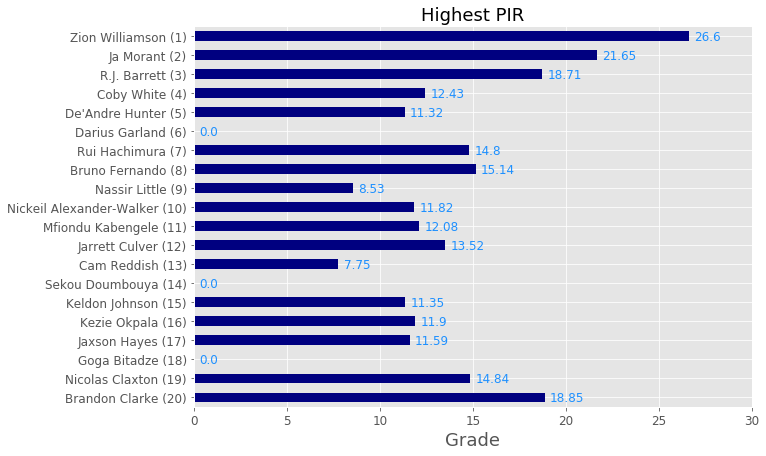

In [15]:
# plotb = top30.plot(kind='bar')
# # Showing on the range from 7000-8100, shows the diffrence better in the plot
# plotb = plotb.set_ylim([20,70])
# plotb.invert_yaxis()
# print(plotb)

ax = top100statsBYPIR['PIR'].plot(kind='barh', figsize=(10,7), color="navy", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Highest PIR", fontsize=18)
ax.set_xlabel("Grade", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xlim([0,30])

# create a list to collect the plt.patches data
totals = []

# # find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# # set individual bar lables using above list
total = sum(totals)

# # set individual bar lables using above list
for i in ax.patches:
# #     # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='dodgerblue',  fontsize=12)

# invert for largest on top 
ax.invert_yaxis()

In [16]:
x = top100statsBYPIR.Pk.values
y = top100statsBYPIR.PIR.values

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

# Predicting a new result
y_pred = regressor.predict(6.5)

# Visualising the Decision Tree Regression results (higher resolution)
x_grid = np.arange(min(x), max(), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [41]:
from math import pi

# number of variable
categories=['PIR','PTS', 'eFG%', 'FGA', '3PA']
# categories=list(categories)[:]
N = len(categories)
print(categories)

['PIR', 'PTS', 'eFG%', 'FGA', '3PA']


In [42]:
namesPlot = top100stats['Player'].head(4).values.flatten().tolist()
namesPlot

['Zion Williamson', 'Ja Morant', 'R.J. Barrett', 'Coby White']

In [43]:
top100stats.index = top100stats['Pk']

In [44]:
top100stats[categories]

,PIR,PTS,eFG%,FGA,3PA
Pk,,,,,
1,26.60,22.606,70.804885,13.182,2.152
2,21.65,18.662,53.590373,12.631,3.769
3,18.71,22.632,50.641442,18.474,6.237
4,12.43,16.057,51.572600,12.686,6.629
5,11.32,12.423,56.427652,8.549,2.254
6,NaN,NaN,NaN,NaN,NaN
7,14.80,15.635,59.646860,10.081,0.838
8,15.14,12.031,59.913624,7.641,0.203
9,8.53,9.806,50.367889,7.611,1.444


In [45]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=top100stats[categories].loc[1].values.flatten().tolist()


values2=top100stats[categories].loc[2].values.flatten().tolist()
# values = values[['Year/PLR', 'Total Awards', 'Total Prized Players', 'ScaledRating']]
values2

values3 = top100stats[categories].loc[3].values.flatten().tolist()
values3

values4 = top100stats[categories].loc[4].values.flatten().tolist()
values4

[12.43, 16.057000000000002, 51.57259971622261, 12.686, 6.629]

In [46]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669]

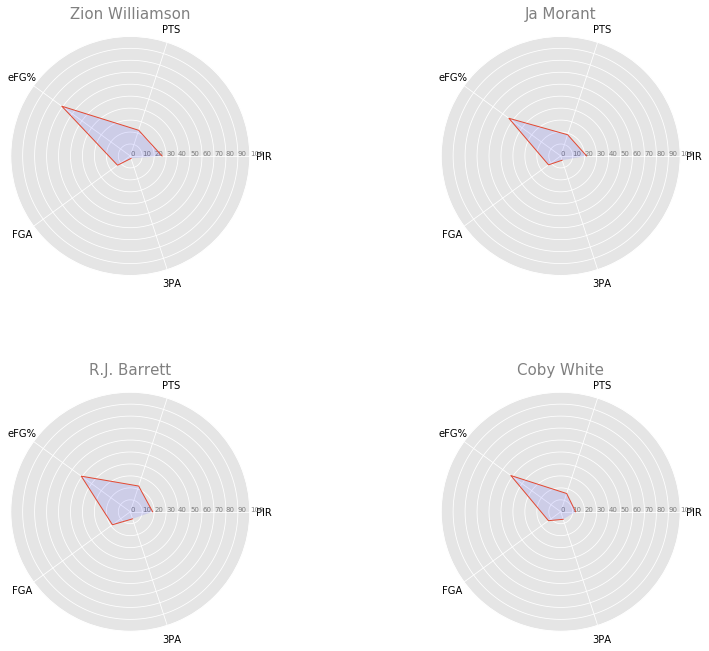

In [48]:
plt.rcParams['figure.figsize'] = (12, 12)

# Initialise the spider plot
ax = plt.subplot(221, polar=True)


# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"], color="grey", size=7)
plt.ylim(0,100)

 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'blue', alpha=0.1)
plt.title(namesPlot[0], fontsize = 15, color='gray')

ax = plt.subplot(222, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values2, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values2, 'blue', alpha=0.1)
plt.title(namesPlot[1], fontsize = 15, color='gray')

ax = plt.subplot(223, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values3, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values3, 'blue', alpha=0.1)
plt.title(namesPlot[2], fontsize = 15, color='gray')

ax = plt.subplot(224, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles, categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values4, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values4, 'blue', alpha=0.1)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.subplots_adjust(wspace=0.8)
plt.title(namesPlot[3], fontsize = 15, color='gray')

plt.show()

In [ ]:
# namesSimiliar = []
# for x in range(0, len(nanProspects)):
#     index = None
#     y = 0
#     flag = -1
#     currName = nanProspects.Player.values[x]
#     while (y < len(playerNames) and flag != 0):
# #         print(y)
#         if (similar(currName, playerNames[y]) >= 0.8):
#             flag = 0
#             nanProspects['Player'].values[x] = playerNames[y]
#         y += 1
# nanProspects = nanProspects.iloc[:, :6]
# nanProspectsLen = len(nanProspects)
# nanProspects